## Visualize MRI Brain Slices



In [1]:
import numpy as np
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Load in numpy data

img_4d = np.load('img_4d.npy')
img_4d.shape

(64, 64, 30, 180)

plotting layer 24 at time point 50 of Image


(-0.5, 63.5, 63.5, -0.5)

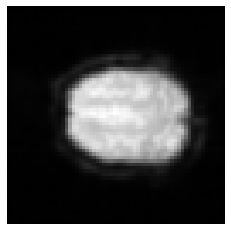

In [3]:
# Visualize a layer of the image

maxval = 29

i = np.random.randint(0, maxval)

time_point = 50
print(f"plotting layer {i} at time point {time_point} of Image")
plt.imshow(img_4d[:,:,i, time_point], cmap = 'gray')
plt.axis('off')

In [4]:
def explore_4d_img(layer):
    plt.figure(figsize = (10, 5))
    plt.imshow(img_4d[:, :, layer, 179], cmap = 'gray')
    plt.title("Layers of the brain")
    plt.axis('off')
    return layer

interact(explore_4d_img, layer = (0, img_4d.shape[2] - 1))

interactive(children=(IntSlider(value=14, description='layer', max=29), Output()), _dom_classes=('widget-inter…

<function __main__.explore_4d_img(layer)>

### Visualize voxel distributions

### Explore Data labels
- check balance of classes
